# Assignment Set 1

### import libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## problem 1.1: Vibrating String

In [75]:
from src.set_1.vibrating_string import VibratingString

for sin(5pix)

In [ ]:
def psi_sin_2pi(x):
    return np.sin(2 * np.pi * x)

string1 = VibratingString(psi_sin_2pi, N=100, simulation_time=1, fig_name="sin_2pi")
string1.run_time_stepping()
string1.plot_static_simulation()
# string1.plot_dynamic_simulation()

for sin(5pix)

In [ ]:
def psi_sin_5pi(x):
    return np.sin(5 * np.pi * x)

string2 = VibratingString(psi_sin_5pi, N=100, simulation_time=1, fig_name="sin_5pi")
string2.run_time_stepping()
string2.plot_static_simulation()
# string2.plot_dynamic_simulation()

for sin(5pix) localized between x = 1/5 and x = 2/5

In [ ]:
def psi_localized(x):
    return np.where((x > 1/5) & (x < 2/5), np.sin(5 * np.pi * x), 0)

string3 = VibratingString(psi_localized, N=100, simulation_time=1, fig_name="localized")
string3.run_time_stepping()
string3.plot_static_simulation() 
# string3.plot_dynamic_simulation()

Create specific 2x2 graph for report

In [ ]:
# Create strings and run simulations
strings = [
    ("sin(2πx)", string1),
    ("sin(5πx)", string2),
    ("sin(5πx) where (1/5 < x < 2/5)", string3)
]

for _, string in strings:
    string.run_time_stepping()

# Plot 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
colormap = plt.cm.plasma
num_steps = 10

for idx, (title, string) in enumerate(strings):
    ax = axes[idx // 2, idx % 2]
    step_size = int(len(string.u) / num_steps)
    norm = plt.Normalize(vmin=0, vmax=num_steps)

    for i, t in enumerate(range(0, len(string.u), step_size)):
        color = colormap(norm(i))
        line_width = 10 * (1 - i / num_steps) + 2
        ax.plot(string.x, string.u[t, :], color=color, alpha=1, linewidth=line_width)

    color = colormap(norm(num_steps))
    ax.plot(string.x, string.u[-1, :], color=color, alpha=1, linewidth=3)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel("Position", fontsize=14)
    ax.set_ylabel("Displacement", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)

# Plot legend in the fourth subplot
legend_ax = axes[1, 1]
legend_ax.axis('off')
for i in range(num_steps + 1):
    legend_ax.plot([], [], color=colormap(norm(i)), label=f"t = {i / num_steps:.1f}s", linewidth=(7 * (1 - i / num_steps) + 3))

legend_ax.legend(loc='center', fontsize=18)

plt.tight_layout()
plt.savefig("results/set_1/wave/2x2_waves.png")
plt.show()

## Problem 1.2: The Time Dependent Diffusion Equation 

In [5]:
from src.set_1.time_dependent_diffusion import TimeDependentDiffusion
from src.set_1.time_independent_diffusion import TimeIndependentDiffusion

In [83]:
simulation = TimeDependentDiffusion(N=50, simulation_time=1, fig_name="diffusion_simulation") 
simulation.run_time_stepping()

In [ ]:
simulation.create_subplot_log_time()

In [ ]:
simulation.check_analytical_solution()

In [ ]:
simulation.create_animation()

Converged after 7527 iterations


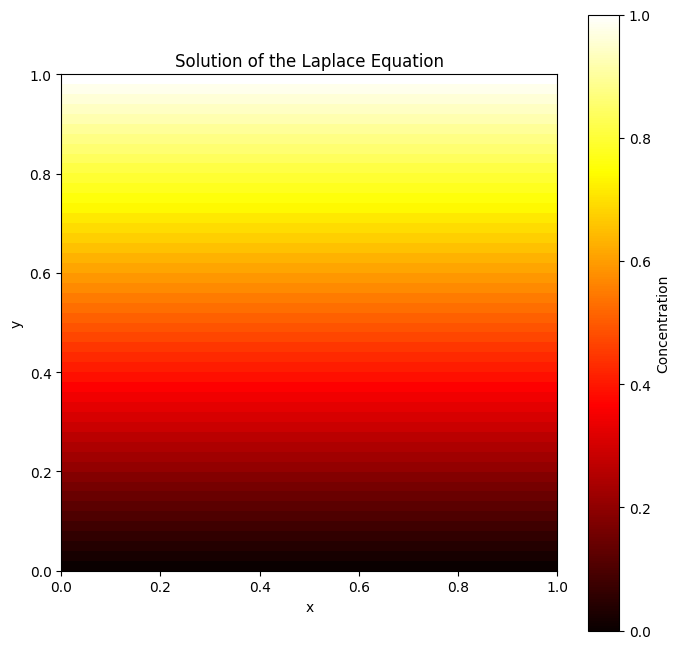

In [6]:
solver = TimeIndependentDiffusion(N=50)
solver.solve()
solver.plot_solution()

In [3]:
from src.set_1.gauss_seidel_iteration import GaussSeidelIteration

Converged after 7429 iterations


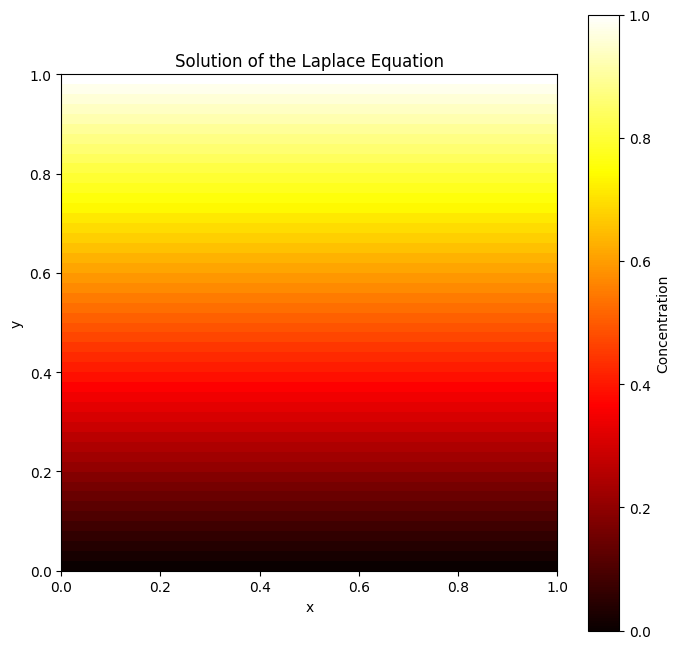

In [4]:
solver_gs = GaussSeidelIteration(N=50)
solver_gs.solve()
solver_gs.plot_solution()

Converged after 663 iterations


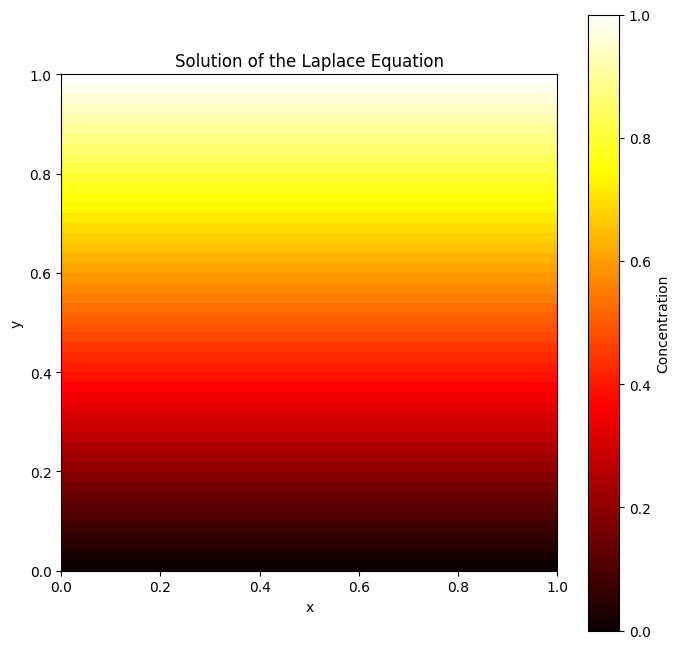

In [2]:
from src.set_1.successive_over_relaxation import SORIteration

solver_sor = SORIteration(N=50)
solver_sor.solve(omega=1.8)
solver_sor.plot_solution()